In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lightning

lightning.seed_everything(123456)
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.2, palette="muted")
plt.rcParams["figure.figsize"] = [12, 4]

%matplotlib inline

Seed set to 123456


In [2]:
from aeon.datasets import load_classification
train_data, train_labels = load_classification("ECG200", split="train", extract_path="/home/ventus/university/data-mining/labs/data/ECG200")
test_data, test_labels = load_classification("ECG200", split="test", extract_path="/home/ventus/university/data-mining/labs/data/ECG200")

train_data = train_data.transpose((0, 2, 1))
test_data = test_data.transpose((0, 2, 1))
train_labels = train_labels.astype(int)%3
test_labels = test_labels.astype(int)%3

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
def eval_classification(train_repr, test_repr):
	svm_classifier = SVC(kernel='linear')
	svm_classifier.fit(train_repr, train_labels)
	y_pred = svm_classifier.predict(test_repr)
	return accuracy_score(test_labels, y_pred)

def fit_predict(train_data, test_data, model, **kwargs):
	model = model(
		input_dims=1,
		output_dims=128,
		**kwargs
	)

	model.fit(train_data, n_epochs=500, verbose=0)
	train_repr = model.encode(train_data, encoding_window='full_series')  # n_instances x output_dims
	test_repr = model.encode(test_data, encoding_window='full_series')  # n_instances x output_dims
	return train_repr, test_repr


In [4]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_data.squeeze(), train_labels)
svm_classifier.call = svm_classifier.predict
svm_classifier.predict = lambda x: svm_classifier.call(x.squeeze())

In [84]:
ts = test_data[0]
svm_classifier.predict(ts)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.42518938  1.4185988   2.6687913   3.298629    2.2645539   0.16517949
 -0.95972652  0.28266835  0.84285041  0.68345828  1.0820879   0.72257693
  0.10981136 -0.69660907 -0.66226782 -0.83998475 -0.9352974  -0.89536172
 -0.924266   -1.0881774  -1.1135846  -1.1306807  -1.2018949  -1.5395089
 -1.5352271  -1.4684167  -2.0780119  -1.8565474  -1.9828685  -2.0412115
 -1.7938604  -1.986162   -1.9469026  -1.7065927  -1.3251418  -1.1470663
 -0.86362855 -0.3560151  -0.20488964  0.18301001  0.51804502  0.61929087
  0.8226008   0.97677914  0.84313124  1.1858633   1.1736722   0.82464362
  0.88404066  0.77681046  0.87503343  0.79528912  0.5541665   0.67989868
  0.61355127  0.62308979  0.46371175  0.58587802  0.62258644  0.31403255
  0.42167617  0.63939179  0.47075583  0.2999824   0.24744652  0.31995727
  0.29976787  0.20092536  0.15236844  0.06930684  0.29062635  0.09621696
  0.37971509  0.79163123  0.60666163  0.80154377  0.69631286  0.20438861
  0.20512207 -0.0451587  -0.18401683  0.11577475 -0.0981316  -0.17835982
 -0.10711954 -0.19349136 -0.01819567 -0.22049304 -0.15255651 -0.11701065
 -0.14515959 -0.11666838 -0.19926184 -0.10983685 -0.14248753  0.09875814].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
test_data.shape

(100, 96, 1)

In [81]:
ts.shape

(96, 1)

In [7]:
scores, change_points = explanations

In [47]:
svm_classifier.predict(test_data)

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1])

In [9]:
change_points

array([ 0, 13, 22, 40, -1])

In [29]:
scores

array([-0.1979511 ,  0.10812076, -0.71816443, -0.27110424])

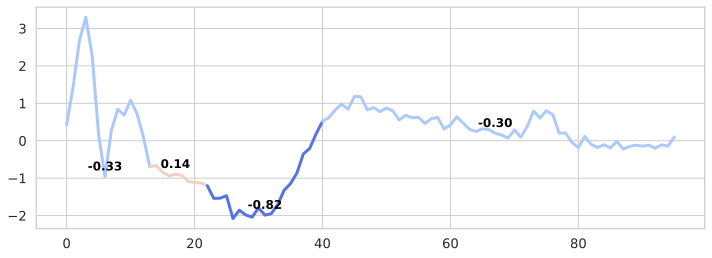

In [ ]:
from LIMESegment.explanations import LIMESegment
import matplotlib.cm as cm
import matplotlib.colors as mcolors


def explain_instance(ts, model, segments=4, background=200, **kwargs):
	norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
	cmap = cm.coolwarm
	scores, change_points = LIMESegment(ts, model, cp=segments-1, n=background, **kwargs)

	for score, start, end in zip(scores, change_points, change_points[1:]):
		end %= len(ts)
		plt.plot(range(start, end+1), ts[start:end+1], color=cmap(norm(score)), linewidth=3)
		mid = (start + end) // 2
		plt.text(mid, ts[mid] + 0.1, f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
	plt.show()

explain_instance(ts, svm_classifier)